In [3]:
import pandas as pd
import numpy as np

### Loading the datasets

In [4]:
description = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\description.csv")
diets = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\diets.csv")
medications = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\medications.csv")
precautions = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\precautions_df.csv")
symptom_severity = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\Symptom-severity.csv")
symptoms = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\symtoms_df.csv")
training = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\Training.csv")
workout = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\workout_df.csv")

In [5]:
training.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


### Check for Missing Values & Class Distribution

In [6]:
training.isnull().sum().sum()

0

In [7]:
training["prognosis"].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

####  There are No Missing Values and the Dataset is Balanced

###  Split Data for Training & Testing

#### separate the features (X) and target (y) and split them into train and test sets (80-20 split)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Features (X) and target (y)
X = training.drop(columns=["prognosis"])
y = training["prognosis"]

In [10]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Check the shape of the splits
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

Training Data: (3936, 132), Testing Data: (984, 132)


### Train the Random Forest Model

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {accuracy:.2f}")

🎯 Model Accuracy: 1.00


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate Model Accuracy

#### We'll predict diseases using X_test and compare them with actual labels (y_test)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [15]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {accuracy:.2f}")

🎯 Model Accuracy: 1.00


#### The model achieved 100% accuracy—which means it's predicting diseases perfectly on the test data

### Step 6 : Load and Merge Additional Data

#### We'll create a dictionary to map each disease to its:
✅ Description
✅ Precautions
✅ Medications
✅ Diets
✅ Workouts

In [16]:
# Load all reference datasets
description = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\description.csv")
diets = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\diets.csv")
medications = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\medications.csv")
precautions = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\precautions_df.csv")
workout = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\workout_df.csv")

In [17]:
# Print column names for all datasets
print("Medications Columns:", medications.columns)
print("Description Columns:", description.columns)
print("Diets Columns:", diets.columns)
print("Precautions Columns:", precautions.columns)
print("Workout Columns:", workout.columns)

Medications Columns: Index(['Disease', 'Medication'], dtype='object')
Description Columns: Index(['Disease', 'Description'], dtype='object')
Diets Columns: Index(['Disease', 'Diet'], dtype='object')
Precautions Columns: Index(['Unnamed: 0', 'Disease', 'Precaution_1', 'Precaution_2', 'Precaution_3',
       'Precaution_4'],
      dtype='object')
Workout Columns: Index(['Unnamed: 0.1', 'Unnamed: 0', 'disease', 'workout'], dtype='object')


In [18]:
# Rename columns in precautions dataset
precautions = precautions.rename(columns={"Unnamed: 0": "Index"}).drop(columns=["Index"])

# Rename columns in workout dataset
workout = workout.rename(columns={"disease": "Disease", "workout": "Workout"}).drop(columns=["Unnamed: 0", "Unnamed: 0.1"])

# Convert to dictionaries
description_dict = dict(zip(description["Disease"], description["Description"]))
diets_dict = dict(zip(diets["Disease"], diets["Diet"]))
medications_dict = dict(zip(medications["Disease"], medications["Medication"]))
precautions_dict = dict(zip(precautions["Disease"], precautions.iloc[:, 1:].values.tolist()))
workout_dict = dict(zip(workout["Disease"], workout["Workout"]))

print("✅ Data Cleaned and Mapped Successfully!")


✅ Data Cleaned and Mapped Successfully!


### Step 7: Build the Final Prediction Function

In [19]:
import numpy as np

def predict_disease():
    # Ask user for symptoms
    user_input = input("\nEnter symptoms (comma-separated): ").strip().lower()
    
    # Convert input to list
    symptoms = [s.strip() for s in user_input.split(",")]
    
    # Convert symptoms to model format
    input_data = np.zeros(len(X.columns))  # Create an empty feature array
    for symptom in symptoms:
        if symptom in X.columns:
            input_data[X.columns.get_loc(symptom)] = 1  # Mark symptom as present
    
    # Predict disease
    predicted_disease = rf_model.predict([input_data])[0]

    # Fetch additional details
    disease_info = {
        "Disease": predicted_disease,
        "Description": description_dict.get(predicted_disease, "No description available."),
        "Precautions": precautions_dict.get(predicted_disease, ["No precautions available."]),
        "Medications": medications_dict.get(predicted_disease, ["No medications available."]),
        "Diet": diets_dict.get(predicted_disease, ["No specific diet available."]),
        "Workout": workout[workout["Disease"].str.lower() == predicted_disease.lower()]["Workout"].tolist()
    }

    # Ensure medications and diet are displayed properly
    def format_list(value):
        if isinstance(value, list):
            return ", ".join(value)  # Convert list to comma-separated string
        return value  # If not a list, return as is

    print("\n🔹 **Predicted Disease:**", disease_info["Disease"], "\n")
    print("📌 **Description:**", disease_info["Description"], "\n")

    print("⚠️ **Precautions:**")
    for precaution in disease_info["Precautions"]:
        print(f"   - {precaution}")

    print("\n💊 **Medications:**")
    print(f"   - {format_list(disease_info['Medications'])}")  # Fixing list issue

    print("\n🥗 **Diet:**")
    print(f"   - {format_list(disease_info['Diet'])}")  # Fixing list issue

    print("\n🏋️ **Workout:**")
    if disease_info["Workout"]:
        for w in disease_info["Workout"]:
            print(f"   - {w}")
    else:
        print("   - No workout suggestions available.")

# Run the function
predict_disease()



Enter symptoms (comma-separated):  itching,skin_rash,nodal_skin_eruptions



🔹 **Predicted Disease:** Fungal infection 

📌 **Description:** Fungal infection is a common skin condition caused by fungi. 

⚠️ **Precautions:**
   - bath twice
   - use detol or neem in bathing water
   - keep infected area dry
   - use clean cloths

💊 **Medications:**
   - ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']

🥗 **Diet:**
   - ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']

🏋️ **Workout:**
   - Avoid sugary foods
   - Consume probiotics
   - Increase intake of garlic
   - Include yogurt in diet
   - Limit processed foods
   - Stay hydrated
   - Consume green tea
   - Eat foods rich in zinc
   - Include turmeric in diet
   - Eat fruits and vegetables


C:\Users\bsrav\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Step 8: Data Visualizations for Insights

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#### Disease Frequency – Bar chart showing the number of times each disease appears in the training dataset.

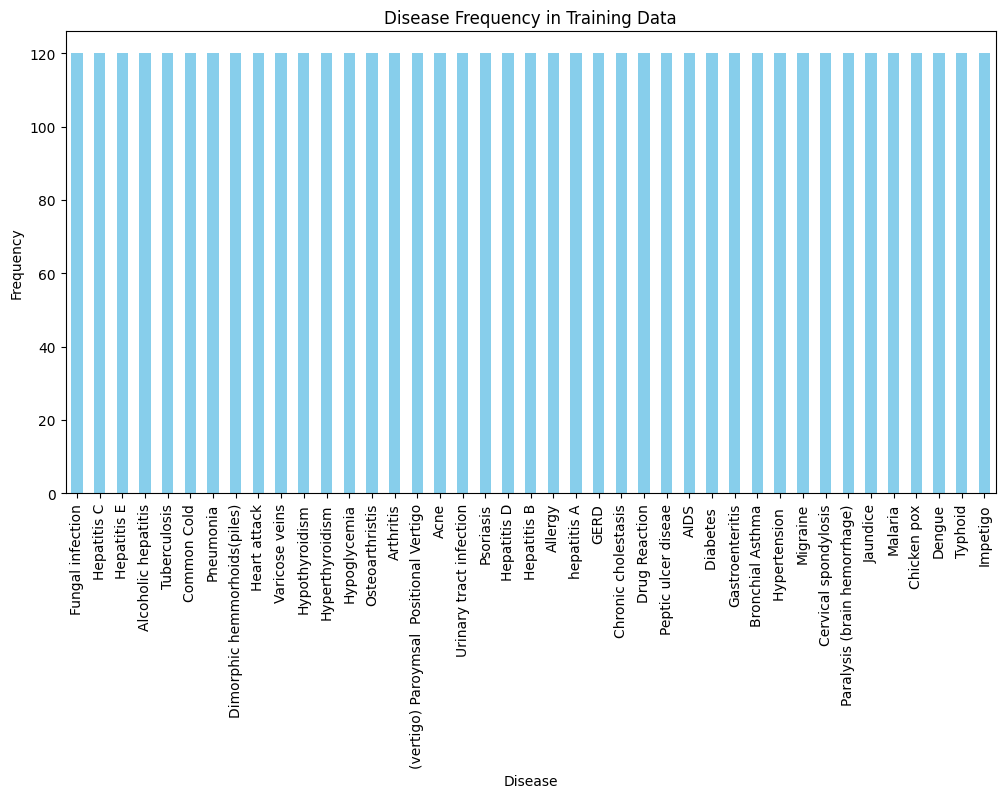

In [21]:
# 1. Disease Frequency
plt.figure(figsize=(12, 6))
training['prognosis'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel("Disease")
plt.ylabel("Frequency")
plt.title("Disease Frequency in Training Data")
plt.xticks(rotation=90)
plt.show()

#### Symptom Severity Distribution – Bar chart showing the distribution of severity levels for symptoms.

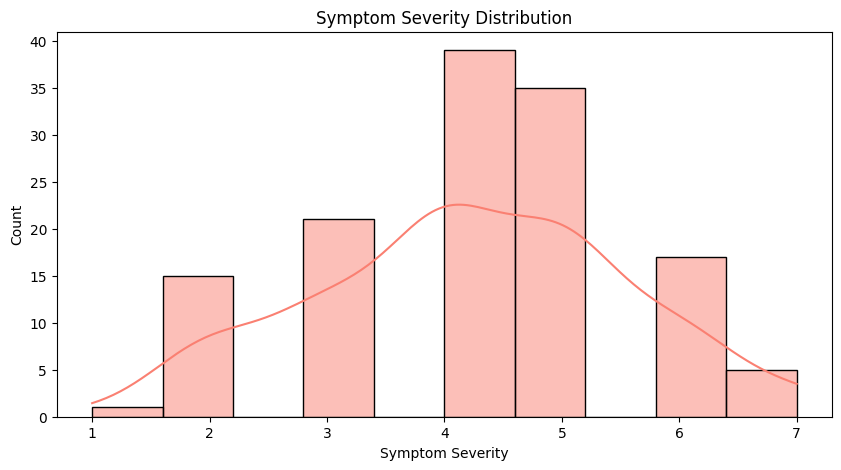

In [22]:
# 2. Symptom Severity Distribution
plt.figure(figsize=(10, 5))
sns.histplot(symptom_severity['weight'], bins=10, kde=True, color='salmon')
plt.xlabel("Symptom Severity")
plt.ylabel("Count")
plt.title("Symptom Severity Distribution")
plt.show()

#### Common Symptoms per Disease – Heatmap of symptoms across different diseases.


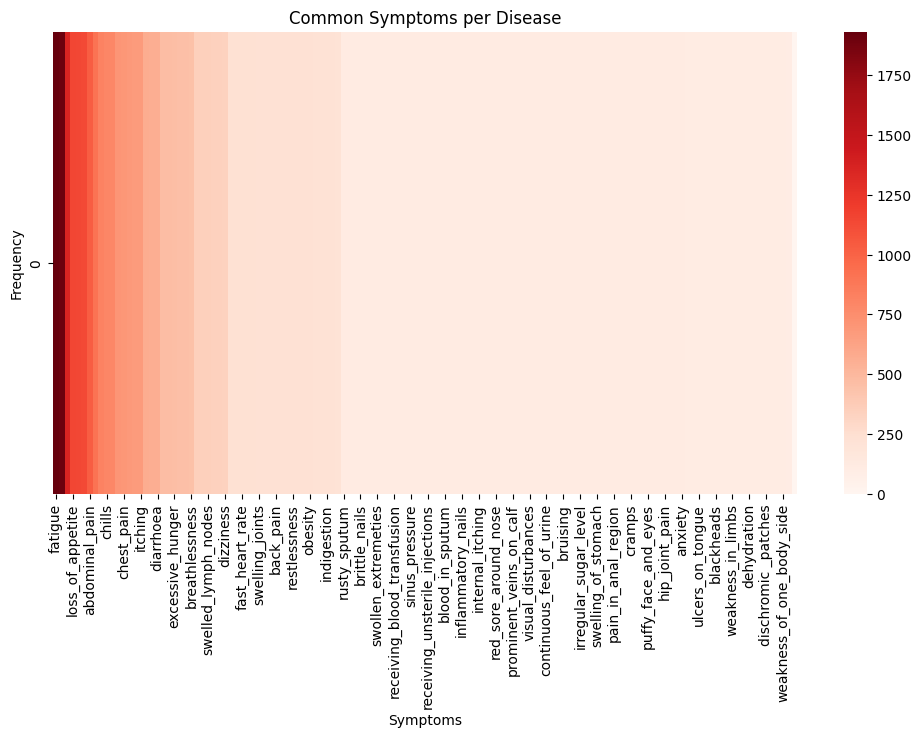

In [23]:
# 3. Common Symptoms per Disease (Heatmap)
symptom_columns = training.columns[:-1]  # Exclude disease column
symptom_counts = training[symptom_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.heatmap(symptom_counts.to_frame().T, cmap='Reds', annot=False)
plt.xlabel("Symptoms")
plt.ylabel("Frequency")
plt.title("Common Symptoms per Disease")
plt.xticks(rotation=90)
plt.show()

#### Precautions Word Cloud – Word cloud visualization for common precautions.

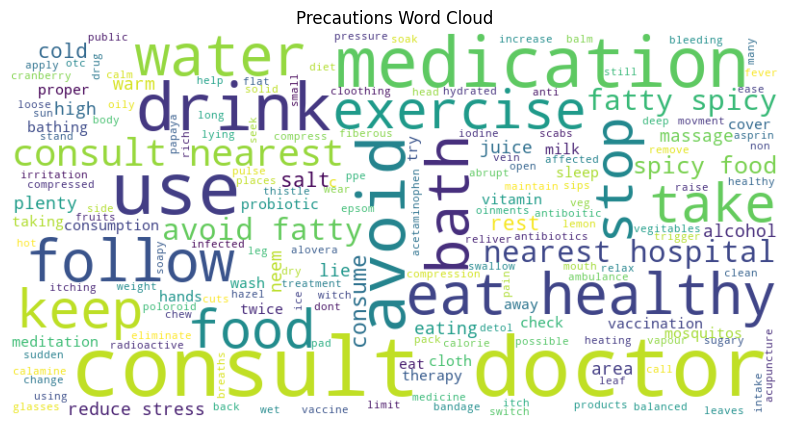

In [24]:
# 4. Precautions Word Cloud
precaution_text = " ".join(precautions.iloc[:, 1:].fillna('').values.flatten())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(precaution_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Precautions Word Cloud")
plt.show()

####  Distribution of Symptoms per Disease : bar chart showing the number of symptoms associated with each disease.

C:\Users\bsrav\AppData\Local\Temp\ipykernel_24976\3650900648.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='coolwarm')


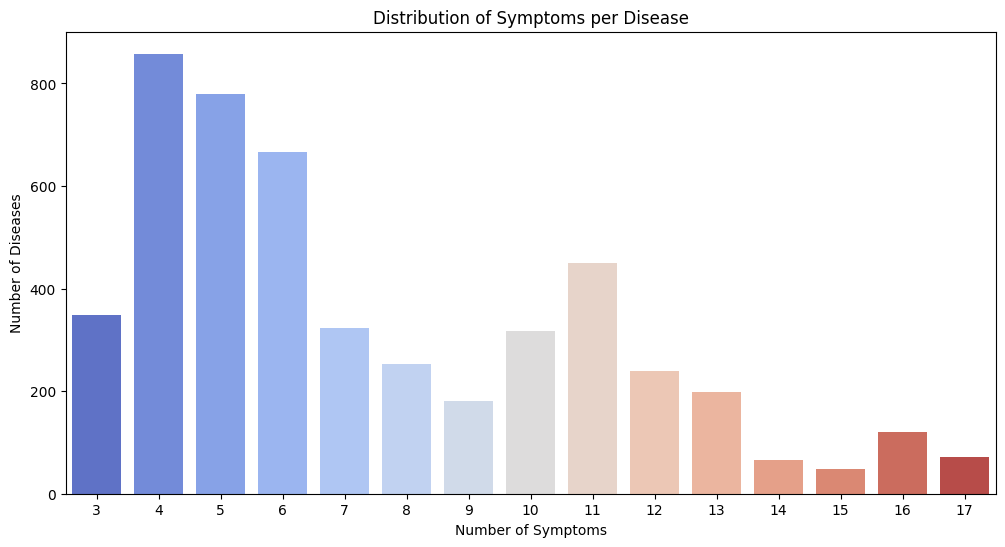

In [25]:
# 5. Distribution of Symptoms per Disease
plt.figure(figsize=(12, 6))
disease_counts = training.iloc[:, :-1].sum(axis=1).value_counts()
sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='coolwarm')
plt.xlabel("Number of Symptoms")
plt.ylabel("Number of Diseases")
plt.title("Distribution of Symptoms per Disease")
plt.show()

In [26]:
description = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\description.csv")
diets = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\diets.csv")
medications = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\medications.csv")
precautions = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\precautions_df.csv")
symptom_severity = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\Symptom-severity.csv")
symptoms = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\symtoms_df.csv")
training = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\Training.csv")
workout = pd.read_csv(r"C:\Users\bsrav\INNOMATICS\INNOMATICS_NOTEBOOK\PROJECT\prj\archive\workout_df.csv")

#### Correlation Heatmap of Symptoms : heatmap to visualize correlations between different symptoms.

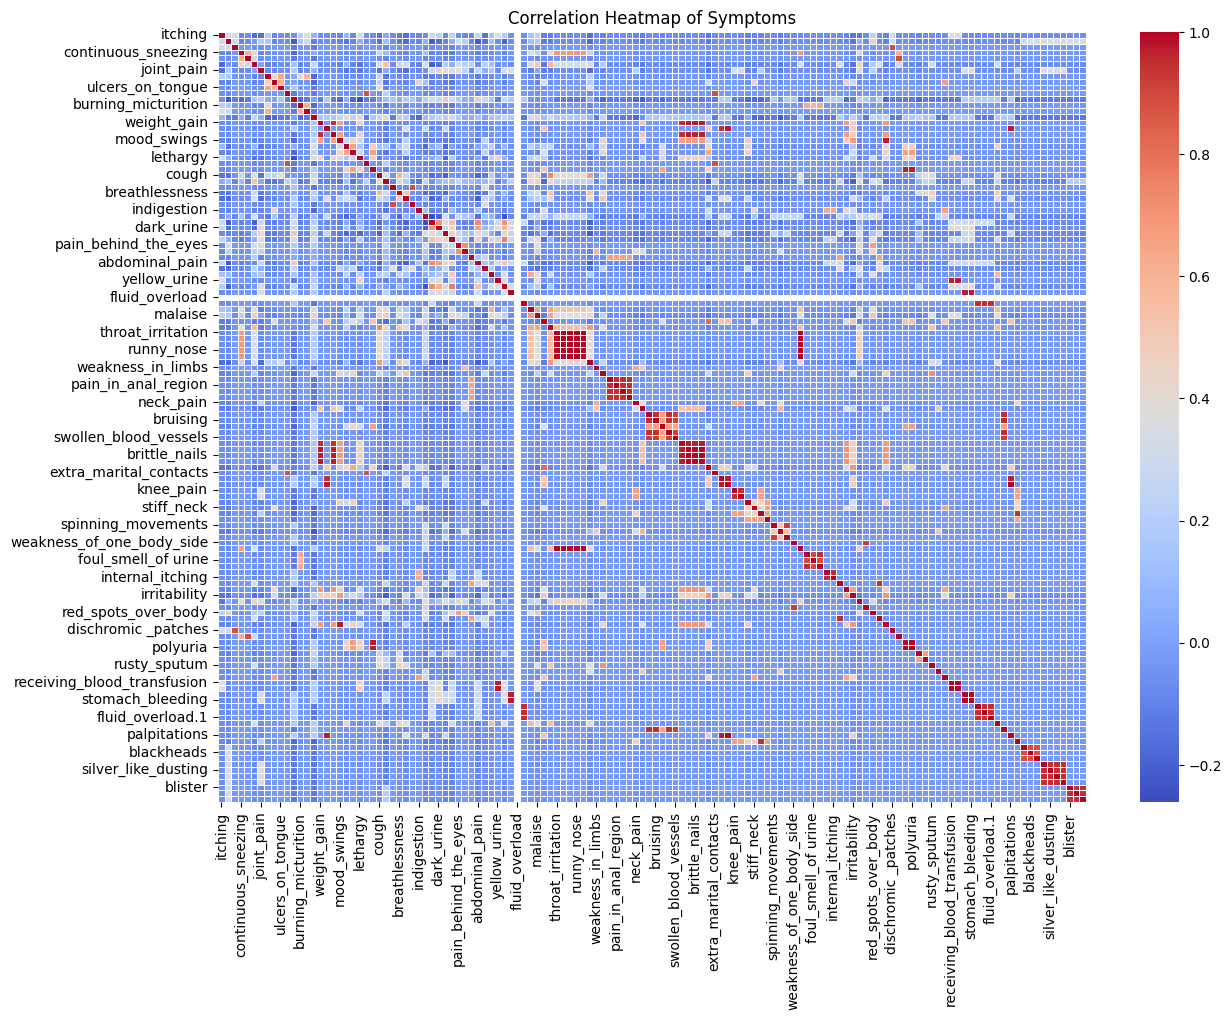

In [27]:
# 6. Correlation Heatmap of Symptoms
plt.figure(figsize=(14, 10))
symptom_corr = training.iloc[:, :-1].corr()
sns.heatmap(symptom_corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Symptoms")
plt.show()

#### Diet Recommendations Word Cloud : word cloud showing the most common diet recommendations.

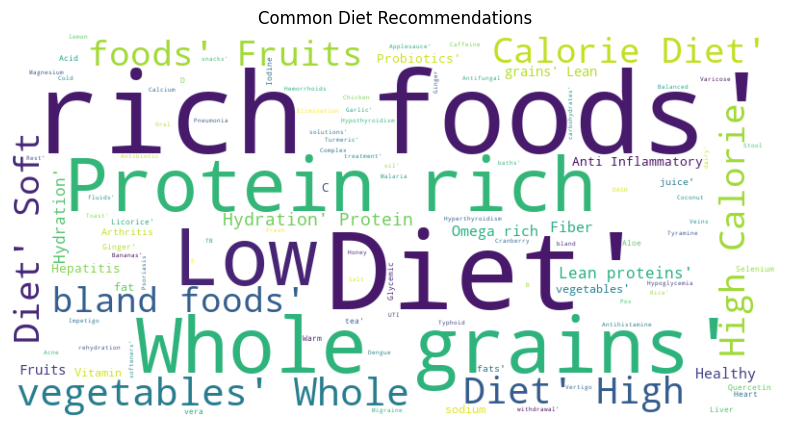

In [28]:
# 7. Diet Recommendations Word Cloud
diet_text = " ".join(diets.iloc[:, 1:].stack().dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(diet_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Diet Recommendations")
plt.show()


In [29]:
import pickle

# Save the trained model
with open("model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

In [30]:
# Load the model
with open("model.pkl", "rb") as file:
    model = pickle.load(file)


In [31]:
# Print column names for all datasets
print("Medications Columns:", medications.columns)
print("Description Columns:", description.columns)
print("Diets Columns:", diets.columns)
print("Precautions Columns:", precautions.columns)
print("Workout Columns:", workout.columns)


Medications Columns: Index(['Disease', 'Medication'], dtype='object')
Description Columns: Index(['Disease', 'Description'], dtype='object')
Diets Columns: Index(['Disease', 'Diet'], dtype='object')
Precautions Columns: Index(['Unnamed: 0', 'Disease', 'Precaution_1', 'Precaution_2', 'Precaution_3',
       'Precaution_4'],
      dtype='object')
Workout Columns: Index(['Unnamed: 0.1', 'Unnamed: 0', 'disease', 'workout'], dtype='object')


In [32]:
import pandas as pd

In [33]:
print("hello world")

hello world
